**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

BLACK = 0
MEDIUM_GRAY = 127
WHITE = 255

max = 256

def getLocalTime() -> str:
    named_tuple = time.localtime() # get struct_time
    return time.strftime("%d/%m/%Y, %H:%M:%S", named_tuple)


def showImage(image, cmap = 'gray') -> None:
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)


def showImages(images, cmap = 'gray') -> None:
    _, axs = plt.subplots(nrows=1, ncols=len(images))

    for i in range(len(images)):
        axs[i].imshow(images[i], cmap = cmap, vmin = BLACK, vmax = WHITE)

    plt.tight_layout()

def saveImage(image, filename = 'result', cmap = 'gray', mode = 'sync') -> None:    
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)
    plt.savefig(filename, bbox_inches = 'tight', pad_inches = 0)

    if mode == 'sync':
        plt.show()


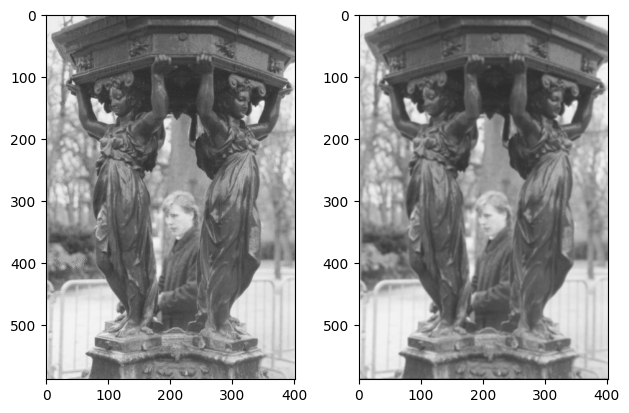

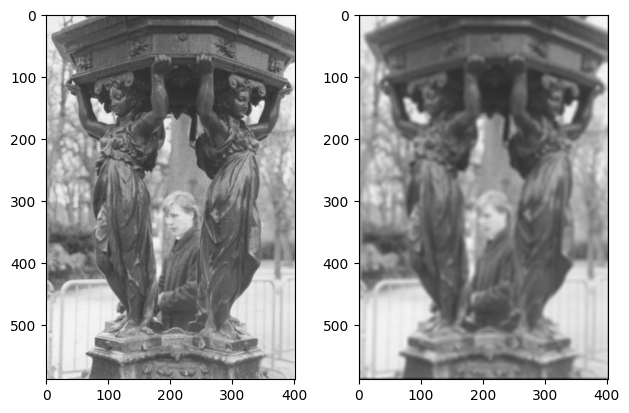

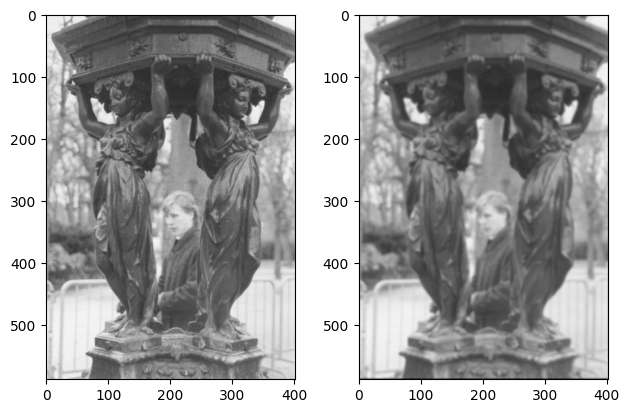

In [54]:
# code here

img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)

def filtroMedia(image, v):
    pad = int(v / 2) 

    height, width = image.shape
    result = np.array(image)
    imageWithPad = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=(0))

    for i in range(pad, height + pad):
        for j in range(pad, width + pad):
            iInfLimit = i - pad
            iSupLimit = i + pad + 1

            jInfLimit = j - pad
            jSupLimit = j + pad + 1

            block = imageWithPad[iInfLimit:iSupLimit, jInfLimit:jSupLimit]
            result[i - pad][j - pad] = block.sum() / v ** 2

    return result

showImages((img1, filtroMedia(img1, 3)))
showImages((img1, filtroMedia(img1, 7)))
showImages((img1, filtroMedia(filtroMedia(filtroMedia(img1, 3), 3), 3)))

2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

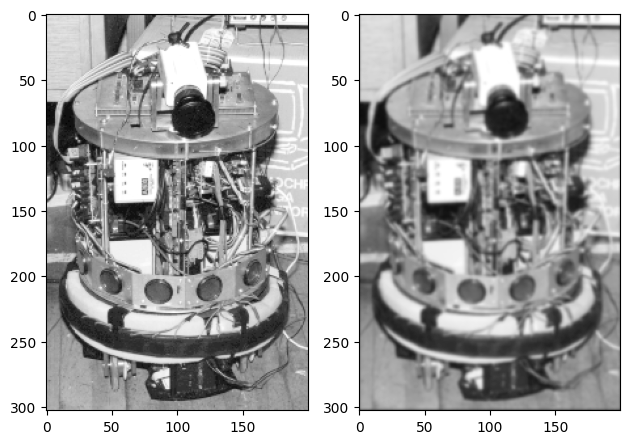

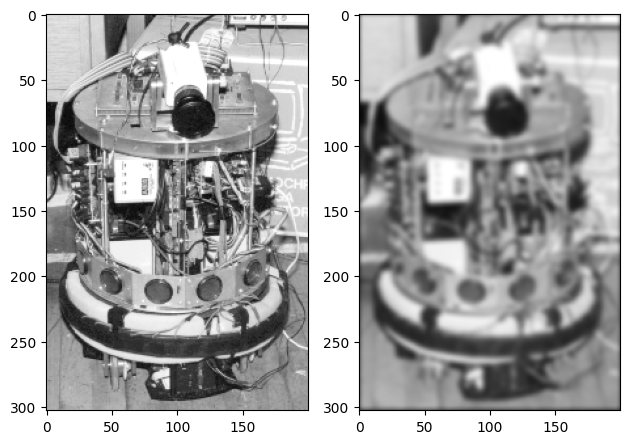

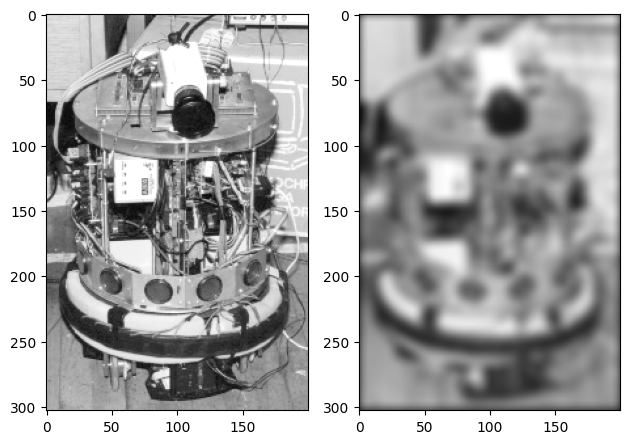

In [65]:
#  code here
img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

def gaussXY(x, y, s):
    coef = 1 / np.sqrt(2 * np.pi * (s ** 2))
    expo = -1 * ((x ** 2) + (y ** 2)) / (2 * (s ** 2))

    return coef * np.exp(expo)

def getGaussMask(sigma, side):
    # height, width = image.shape
    result = np.zeros((side, side))
    l = int((side - 1) / 2)

    for i in range(-l, l + 1):
        for j in range(-l, l + 1):
            result[i + l][j + l] = gaussXY(i, j, sigma)
            
    return result

def filtroGaussiano(image, sigma, side):
    height, width = image.shape
    pad = int((side - 1) / 2)
    result = np.zeros(image.shape)
    imageWithPad = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=(0))
    
    mask = getGaussMask(sigma, side)

    for i in range(pad, height + pad):
        for j in range(pad, width + pad):
            iInfLimit = i - pad
            iSupLimit = i + pad + 1

            jInfLimit = j - pad
            jSupLimit = j + pad + 1

            block = imageWithPad[iInfLimit:iSupLimit, jInfLimit:jSupLimit]
            result[i - pad][j - pad] = (block * mask).sum() / mask.sum()

    return result

showImages((img2, filtroGaussiano(img2, 1, 5)))
showImages((img2, filtroGaussiano(img2, 2, 9)))
showImages((img2, filtroGaussiano(img2, 4, 15)))

3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

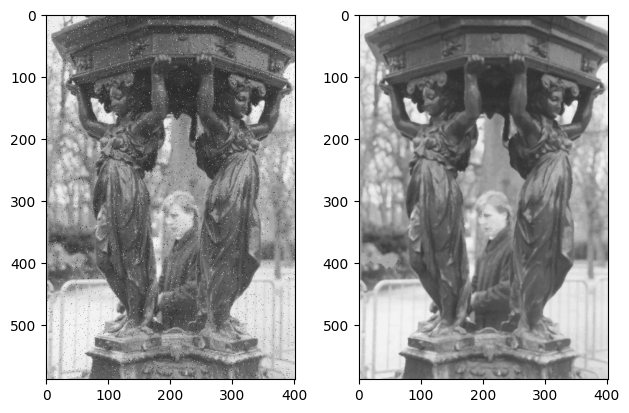

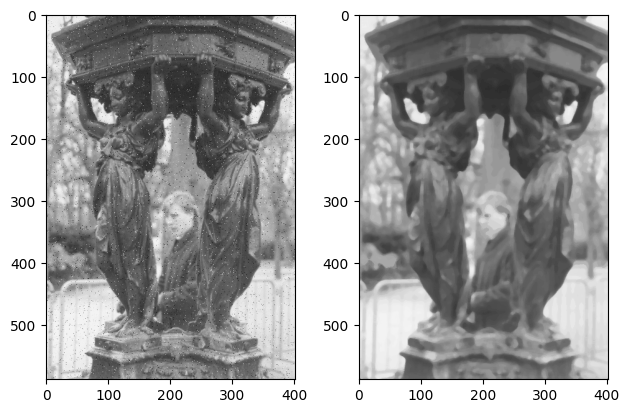

In [43]:
#  code here
img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)

def filtroMediana(image, v):
    pad = int(v / 2) 

    height, width = image.shape
    result = np.array(image)
    imageWithPad = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=(0))
    pontoMedio = int(np.ceil((v ** 2) / 2))

    for i in range(pad, height + pad):
        for j in range(pad, width + pad):
            iInfLimit = i - pad
            iSupLimit = i + pad + 1

            jInfLimit = j - pad
            jSupLimit = j + pad + 1

            block = imageWithPad[iInfLimit:iSupLimit, jInfLimit:jSupLimit]
            values = block.flatten()
            values.sort()

            result[i - pad][j - pad] = values[pontoMedio]

    return result

showImages((img3, filtroMediana(img3, 3)))
showImages((img3, filtroMediana(img3, 7)))

4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

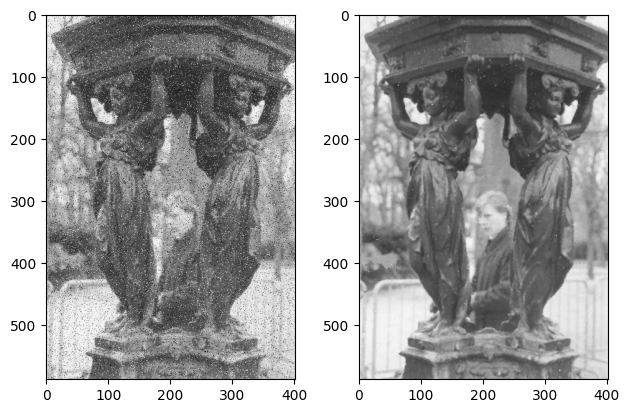

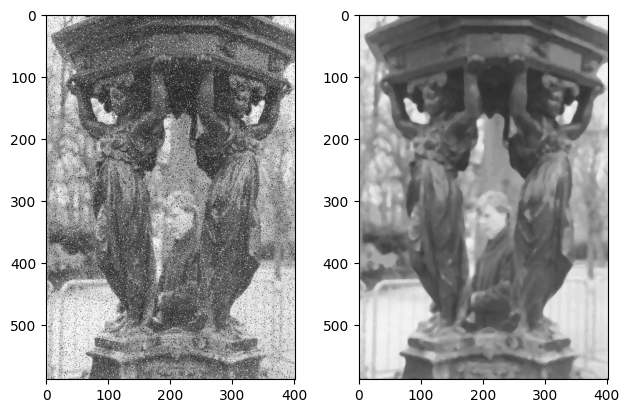

In [44]:
#  code here
img4 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

showImages((img4, filtroMediana(img4, 3)))
showImages((img4, filtroMediana(img4, 7)))